<h2>About this Project</h2>
In this project, you will implement Gradient Boosted Regression Trees (GBRTs).

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
</ol>
<p>You can also download a copy of this notebook in multiple formats using the <strong>Download as</strong> option in the <strong>File</strong> menu above.</p>

### Getting Started

Before you get started, let's import a few packages that you will need.

In [1]:
import numpy as np
from pylab import *
from numpy.matlib import repmat
import sys
import matplotlib 
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time
from helper import *
%matplotlib inline

print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


In this project, we will work with an artificial 2D spiral dataset of size 150 (for visualization), and a high dimensional dataset [ION](https://archive.ics.uci.edu/ml/datasets/Ionosphere) (for a binary test classification problem).

In [2]:
xTrSpiral, yTrSpiral, xTeSpiral, yTeSpiral = spiraldata(150)
xTrIon, yTrIon, xTeIon, yTeIon = iondata()

You will use the regression tree from a previous project. As a reminder, the following code shows you how to instantiate a decision tree:

In [3]:
# Create a regression tree with depth 4
tree = RegressionTree(depth=4)

# To fit/train the regression tree
tree.fit(xTrSpiral, yTrSpiral)

# To use the trained regression tree to predict a score for the example
score = tree.predict(xTrSpiral)

# To use the trained regression tree to make a +1/-1 prediction
pred = np.sign(tree.predict(xTrSpiral))

Now run the following cell that evaluates your `depth=4` decision tree on the training set and test set. You might see that the difference between training error and test error is small (no overfitting) but both the errors are rather high. This is a sign of underfitting or high bias. 

In [4]:
# Evaluate the depth 4 decision tree
# tr_err   = np.mean((np.sign(tree.predict(xTrSpiral)) - yTrSpiral)**2)
# te_err   = np.mean((np.sign(tree.predict(xTeSpiral)) - yTeSpiral)**2)

print("Training error: %.4f" % np.mean(np.sign(tree.predict(xTrSpiral)) != yTrSpiral))
print("Testing error:  %.4f" % np.mean(np.sign(tree.predict(xTeSpiral)) != yTeSpiral))

Training error: 0.3733
Testing error:  0.3800


To convince you further that the `depth=4` tree is underfitting, we create the following function `visclassifier()`, which plots the decision boundary of a classifier in 2 dimensions. Execute the following code to see what the decision boundary of your tree looks like on the spiral data set.

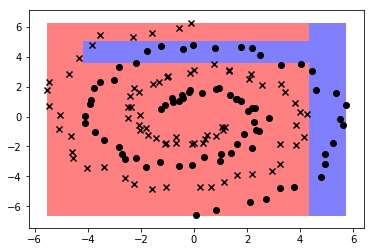

In [5]:
def visclassifier(fun,xTr,yTr,newfig=True):
    """
    visualize decision boundary
    Define the symbols and colors we'll use in the plots later
    """

    yTr = np.array(yTr).flatten()
    
    symbols = ["ko","kx"]
    marker_symbols = ['o', 'x']
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    # get the unique values from labels array
    classvals = np.unique(yTr)

    if newfig:
        plt.figure()

    # return 300 evenly spaced numbers over this interval
    res=300
    xrange = np.linspace(min(xTr[:, 0]), max(xTr[:, 0]),res)
    yrange = np.linspace(min(xTr[:, 1]), max(xTr[:, 1]),res)
    
    # repeat this matrix 300 times for both axes
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T

    
    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T

    # test all of these points on the grid
    testpreds = fun(xTe)
    
    # reshape it back together to make our grid
    Z = testpreds.reshape(res, res)
    # Z[0,0] = 1 # optional: scale the colors correctly
    
    # fill in the contours for these predictions
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)

    # creates x's and o's for training set
    for idx, c in enumerate(classvals):
        plt.scatter(xTr[yTr == c,0],
            xTr[yTr == c,1],
            marker=marker_symbols[idx],
            color='k'
                   )

    plt.axis('tight')
    # shows figure and blocks
    plt.show()
    

visclassifier(lambda X: tree.predict(X),xTrSpiral,yTrSpiral)

As you can see from the graph above, the `depth=4` tree is too simple and is not capable to capture the inherit information of the dataset. 

## Gradient Boosting Regression Tree in Action

### Part One: Implement `evalboostforest` [Graded]

CART trees are known to be high variance classifiers if trained to full depth. However, if you build trees of small depth (e.g. only `depth=3` or `depth=4`), the trees do not overfit as we see above. Instead, they suffer from **high bias** and thus **underfit**. We can reduce the bias of a classifier with gradient boosting.

Before implementing Gradient Boosted Regression Trees, you will implement **`evalboostforest`** with an additional argument `alphas` that lets you weigh the trees' predictions with any weights (in bagging all weights `alpha[i]` were equal).

Similar to bagging, the `evalboostforest` is provided a list of $m$ trees $\left[ h_1, \dots, h_m \right]$ and $n$ $d$-dimensional data points. However, this time, the function will weigh each tree $h_j$ according to $\alpha_j$.

More precisely, for each test sample $\mathbf{x}_i$, `evalboostforest` should output the following prediction:

$$
H \left( \mathbf{x}_i \right) = \sum_{j=1}^m \alpha_j h_j \left( \mathbf{x}_i \right)
$$

In [6]:
def evalboostforest(trees, X, alphas=None):
    """
    Evaluates data points X using trees using weights alphas (optional).
    
    Input:
        trees:  list of length m of RegressionTree decision trees
        X:      n x d matrix of data points
        alphas: m-dimensional weight vector for the ensemble's prediction
        
    Output:
        pred:   n-dimensional vector of predictions
    """
    m = len(trees)
    n,d = X.shape
    
    if alphas is None:
        alphas = np.ones(m) / len(trees)
            
    pred = np.zeros(n)
    
    # YOUR CODE HERE
    for j in range(m):
        tree = trees[j]
        alpha_j = alphas[j]
        
        pred += alpha_j * tree.predict(X)
    
    return pred
    # raise NotImplementedError()

In [7]:
def evalboostforest_test0():
    m = 200
    x = np.arange(100).reshape((100, 1))
    y = np.arange(100)
    trees = forest(x, y, m) # create a list of trees 
    preds = evalboostforest(trees, x)
    return preds.shape == y.shape

def evalboostforest_test1():
    m = 200
    x = np.random.rand(10,3)
    y = np.ones(10)
    x2 = np.random.rand(10,3)

    max_depth = 0
    
    # Create a forest with trees depth 0
    # Since the data are all ones, each tree will return 1 as prediction
    trees = forest(x, y, m, max_depth) # create a list of trees      
    pred = evalboostforest(trees, x2)[0]
    return np.isclose(pred,1)  # the prediction should be equal to the sum of weights

def evalboostforest_test2(): 
    # results should match evalforest if alphas are 1/m and labels +1, -1
    m = 20
    x = np.arange(100).reshape((100, 1))
    y = np.sign(np.arange(100))
    trees = forest(x, y, m) # create a list of m trees 

    alphas=np.ones(m)/m
    preds1 = evalforest(trees, x) #evaluate the forest using our own implementation
    preds2 = evalboostforest(trees, x, alphas)
    return np.all(np.isclose(preds1,preds2))

def evalboostforest_test3(): 
    # if only alpha[i]=1 and all others are 0, the result should match exactly 
    # the predictions of the ith tree
    m = 20
    x = np.random.rand(100,5)
    y = np.arange(100)
    x2 = np.random.rand(20,5)

    trees = forest(x, y, m)  # create a list of m trees
    allmatch=True
    for i in range(m): # go through each tree i
        alphas=np.zeros(m)
        alphas[i]=1.0; # set only alpha[i]=1 all other alpha=0
        preds1 = trees[i].predict(x2) # get prediction of ith tree
        preds2 = evalboostforest(trees, x2, alphas) # get prediction of weighted ensemble
        allmatch=allmatch and all(np.isclose(preds1,preds2))
    return allmatch


# and some new tests to check if the weights (and the np.sign function) were incorporated correctly 
runtest(evalboostforest_test0, 'evalboostforest_test0')
runtest(evalboostforest_test1, 'evalboostforest_test1')
runtest(evalboostforest_test2, 'evalboostforest_test2')
runtest(evalboostforest_test3, 'evalboostforest_test3')

Running Test: evalboostforest_test0 ... ✔ Passed!
Running Test: evalboostforest_test1 ... ✔ Passed!
Running Test: evalboostforest_test2 ... ✔ Passed!
Running Test: evalboostforest_test3 ... ✔ Passed!


In [ ]:
# Autograder test cell - worth 1 point
# runs evalboostforest_test0

In [ ]:
# Autograder test cell - worth 1 point
# runs evalboostforest_test1

In [ ]:
# Autograder test cell - worth 1 point
# runs evalboostforest_test2

In [ ]:
# Autograder test cell - worth 1 point
# runs evalboostforest_test3

### Part Two: Implement `GBRT` [Graded]

Finally implement the function **`GBRT`**, which applies Gradient Boosting to the decision tree model. You can use the following pseudocode to write the function. You can also use your `evalboostforest` function to evaluate your boosted ensemble (provided you pass on the weights correctly).

<center><img src="gbrt_pseudocode.png" width="50%" /></center>

In [8]:
def GBRT(xTr, yTr, m, maxdepth=4, alpha=0.1):
    """
    An implementation of Gradient Boosted Regression Trees with m trees of depth=maxdepth.
    
    Input:
        xTr:      n x d matrix of data points
        yTr:      n-dimensional vector of labels
        m:        number of trees in the forest
        maxdepth: maximum depth of tree
        alpha:    learning rate for the GBRT (also the weight for each tree in the ensemble)
        
        
    Output:
        trees, alphas
        trees: list of decision trees of length m
        alphas: weights of each tree
    """
    
    n, d = xTr.shape
    trees = []
    alphas = []
    
    # Ensemble tree H = 0 right now. Therefore, t_i = y_i for all i
    # Make a copy of the ground truth label
    # this will be the initial ground truth for the first GBRT
    # t = np.copy(yTr)
    #Initialize t as a copy of yTr
    #For each iteration:
        #Create a tree, fit to xTr and t 
        #Append this tree to list of trees
        #Append alpha to list of alphas
        #Generate sum of weighted predictions of all trees with given alphas
        #Calculate new t value by subtracting weighted predictions from yTr
    #Return list of trees and list of alphas
    # YOUR CODE HERE
    H = np.zeros(n)
    
    for _ in range(m):
        residuals = yTr - H
        tree = RegressionTree(depth=maxdepth)
        tree.fit(xTr, residuals)
        trees.append(tree)
        alpha_j = alpha
        alphas.append(alpha_j)
        H += alpha_j * tree.predict(xTr)
    
    return trees, alphas
    # raise NotImplementedError()
    

In [9]:
trees, weights = GBRT(xTrSpiral,yTrSpiral, 50)

In [10]:
def GBRT_test1():
    m = 40
    x = np.arange(100).reshape((100, 1))
    y = np.arange(100)
    trees, weights = GBRT(x, y, m, alpha=0.1)
    return len(trees) == m and len(weights) == m # make sure there are m trees in the forest

def GBRT_test2():
    m = 20
    x = np.arange(100).reshape((100, 1))
    y = np.arange(100)
    max_depth = 4
    trees, weights = GBRT(x, y, m, max_depth)
    depths_forest = np.array([tree.depth for tree in trees]) # Get the depth of all trees in the forest
    return np.all(depths_forest == max_depth) # make sure that the max depth of all the trees is correct

def GBRT_test3():
    m = 4
    xTrSpiral,yTrSpiral,_,_= spiraldata(150)
    max_depth = 4
    trees, weights = GBRT(xTrSpiral, yTrSpiral, m, max_depth, 1) # Create a gradient boosted forest with 4 trees
    
    errs = [] 
    for i in range(m):
        predH = evalboostforest(trees[:i+1], xTrSpiral, weights[:i+1]) # calculate the prediction of the first i-th tree
        err = np.mean(np.sign(predH) != yTrSpiral) # calculate the error of the first i-th tree
        errs.append(err) # keep track of the error
    
    # your errs should be decreasing, i.e., the different between two subsequent errors is <= 0
    return np.all(np.diff(errs) <= 0) 
    
runtest(GBRT_test1, 'GBRT_test1')
runtest(GBRT_test2, 'GBRT_test2')
runtest(GBRT_test3, 'GBRT_test3')

Running Test: GBRT_test1 ... ✔ Passed!
Running Test: GBRT_test2 ... ✔ Passed!
Running Test: GBRT_test3 ... ✔ Passed!


In [ ]:
# Autograder test cell - worth 1 point
# runs GBRT_test1

In [ ]:
# Autograder test cell - worth 1 point
# runs GBRT_test2

In [ ]:
# Autograder test cell - worth 1 point
# runs GBRT_testt3

### Visualize the Decision Boundary

The following script visualizes the decision boundary of a boosted ensemble of CART trees. It should perform much better than just 1 CART tree of the same depth.

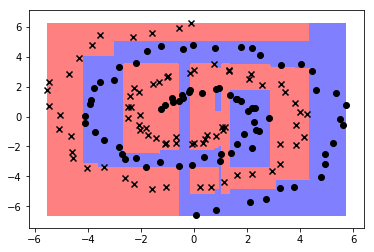

Training error: 0.0333
Testing error:  0.0867


In [11]:
trees, weights=GBRT(xTrSpiral,yTrSpiral, 40, maxdepth=4, alpha=0.03) # compute tree on training data 
visclassifier(lambda X:evalboostforest(trees, X, weights),xTrSpiral,yTrSpiral)
print("Training error: %.4f" % np.mean(np.sign(evalforest(trees,xTrSpiral)) != yTrSpiral))
print("Testing error:  %.4f" % np.mean(np.sign(evalforest(trees,xTeSpiral)) != yTeSpiral))

<h3>Evaluate Test and Training Error</h3>

<p>The following script evaluates the test and training error of an ensemble of CART trees as we vary the number of trees.</p>

[0]training err = 0.0356	testing err = 0.2286
[1]training err = 0.0320	testing err = 0.2286
[2]training err = 0.0214	testing err = 0.1571
[3]training err = 0.0249	testing err = 0.2286
[4]training err = 0.0178	testing err = 0.1571
[5]training err = 0.0178	testing err = 0.1571
[6]training err = 0.0142	testing err = 0.1571
[7]training err = 0.0142	testing err = 0.1571
[8]training err = 0.0107	testing err = 0.1571
[9]training err = 0.0071	testing err = 0.1571
[10]training err = 0.0107	testing err = 0.1571
[11]training err = 0.0071	testing err = 0.1571
[12]training err = 0.0071	testing err = 0.1714
[13]training err = 0.0071	testing err = 0.1571
[14]training err = 0.0071	testing err = 0.1714
[15]training err = 0.0071	testing err = 0.1571
[16]training err = 0.0071	testing err = 0.1571
[17]training err = 0.0071	testing err = 0.1571
[18]training err = 0.0071	testing err = 0.1714
[19]training err = 0.0036	testing err = 0.1429
[20]training err = 0.0036	testing err = 0.1571
[21]training err = 0.00

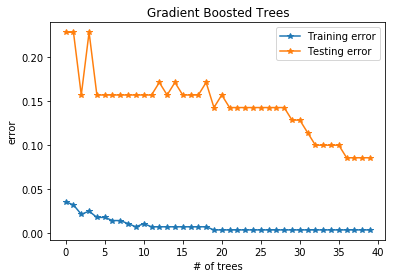

In [14]:
M=40 # max number of trees
err_trB=[]
err_teB=[]
alltrees, allweights =GBRT(xTrIon,yTrIon, M, maxdepth=4, alpha=0.05)
for i in range(M):
    trees=alltrees[:i+1]
    weights=allweights[:i+1]
    trErr = np.mean(np.sign(evalboostforest(trees,xTrIon, weights)) != yTrIon)
    teErr = np.mean(np.sign(evalboostforest(trees,xTeIon, weights)) != yTeIon)
    err_trB.append(trErr)
    err_teB.append(teErr)
    print("[%d]training err = %.4f\ttesting err = %.4f" % (i,trErr, teErr))

plt.figure()
line_tr, = plt.plot(range(M), err_trB, '-*', label="Training error")
line_te, = plt.plot(range(M), err_teB, '-*', label="Testing error")
plt.title("Gradient Boosted Trees")
plt.legend(handles=[line_tr, line_te])
plt.xlabel("# of trees")
plt.ylabel("error")
plt.show()

### 2D Interactive Demo on Spiral Data (adding trees with clicks)

The following demo visualizes the GBRT classifier on the spiral data. With each click you can add one more regression tree to the classifier.

<IPython.core.display.Javascript object>


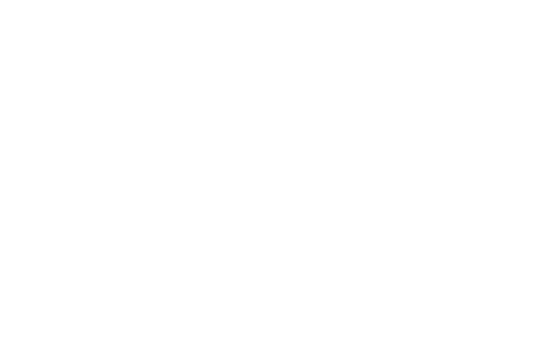

Click to add a tree.


(0, 1)

<IPython.core.display.Javascript object>


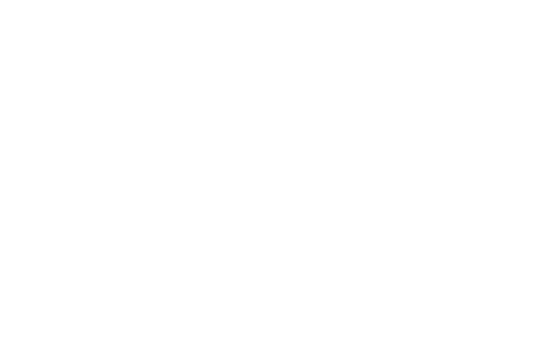

In [15]:
def onclick_forest(event):
    """
    Visualize forest, including new point
    """
    global xTrain,yTrain,w,b,M,Q,trees,weights
    
    if event.key == 'shift': Q+=10
    else: Q+=1
    Q=min(Q,M)

    classvals = np.unique(yTrain)
        
    # return 300 evenly spaced numbers over this interval
    res=300
    xrange = np.linspace(0, 1,res)
    yrange = np.linspace(0, 1,res)
    
    # repeat this matrix 300 times for both axes
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T

    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T

    # get forest
    
    fun = lambda X:evalboostforest(trees[:Q],X, weights[:Q])        
    # test all of these points on the grid
    testpreds = fun(xTe)
    trerr=np.mean(np.sign(fun(xTrain))==np.sign(yTrain))
    
    # reshape it back together to make our grid
    Z = testpreds.reshape(res, res)
    
    plt.cla()    
    plt.xlim((0,1))
    plt.ylim((0,1))
    # fill in the contours for these predictions
    marker_symbols = ['o', 'x']
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)
    
    for idx, c in enumerate(classvals):
        plt.scatter(xTrain[yTrain == c,0],xTrain[yTrain == c,1],marker=marker_symbols[idx],color='k')
    plt.show()
    plt.title('# Trees: %i Training Accuracy: %2.2f' % (Q,trerr))
    
        
xTrain=xTrSpiral.copy()/14+0.5
yTrain=yTrSpiral.copy()
yTrain=yTrain.astype(int)

# Hyper-parameters (feel free to play with them)
M=50
alpha=0.05;
depth=5;
trees, weights=GBRT(xTrain, yTrain, M,alpha=alpha,maxdepth=depth)
Q=0;


%matplotlib notebook
fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', onclick_forest) 
print('Click to add a tree.');
plt.title('Click to start boosting on the spiral data.')
visclassifier(lambda X: np.sum(X,1)*0,xTrain,yTrain,newfig=False)
plt.xlim(0,1)
plt.ylim(0,1)

### 1D Interactive Demo

The next interactive demo shows a 1-dimensional curve fitted with GBRT. We sample 100 training data points from the curve with additive noise. Note how the training and testing errors decrease as you add trees to your ensemble, but the testing error eventually increases again. Initially (with only a few trees) you will see that the predicted (red) curve is very smooth and then becomes increasingly less smooth as you add more trees (here you are decreasing bias).

In the end, the predicted curve becomes rather complicated and overfits to the training data (high variance). In this demo, you can nicely see how GBRT starts out with high bias (too smooth), then lowers the bias, but eventually ends up with high variance (very jiggery overfitting curve). As with hyperparameters in Machine Learning, the number of trees in GBRT has a significant impact on the generalization error.

<IPython.core.display.Javascript object>


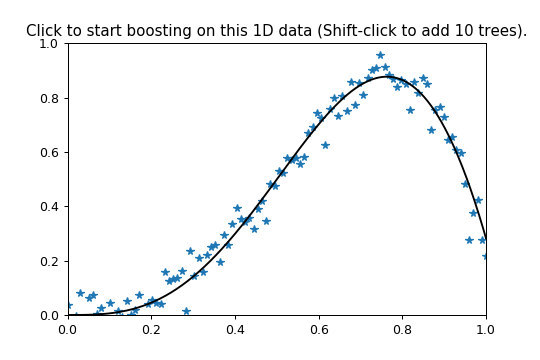

Click to add a tree (shift-click and add 10 trees).


(0, 1)

In [16]:
def onclick_forest(event):
    """
    Visualize forest, including new point
    """
    global xTrain,yTrain,Q,trees,weights
    
    if event.key == 'shift': Q+=10
    else: Q+=1
    Q=min(Q,M)


    plt.cla()    
    plt.xlim((0,1))
    plt.ylim((0,1))
    pTest=evalboostforest(trees[:Q],xTest,weights[:Q])    
    pTrain=evalboostforest(trees[:Q],xTrain,weights[:Q])    


    errTrain=np.sqrt(np.mean((pTrain-yTrain)**2))
    errTest=np.sqrt(np.mean((pTest-yTest)**2))

    plt.plot(xTrain[:,0],yTrain,'bx')
    plt.plot(xTest[:,0],pTest,'r-')
    plt.plot(xTest[:,0],yTest,'k-')

    plt.legend(['Training data','Prediction'])
    plt.title('(%i Trees)  Error Tr: %2.4f, Te:%2.4f' % (Q,errTrain,errTest))
    plt.show()
    
        
n=100;
NOISE=0.05
xTrain=np.array([np.linspace(0,1,n),np.zeros(n)]).T
yTrain=2*np.sin(xTrain[:,0]*3)*(xTrain[:,0]**2)
yTrain+=np.random.randn(yTrain.size)*NOISE;
ntest=300;
xTest=np.array([linspace(0,1,ntest),np.zeros(ntest)]).T
yTest=2*np.sin(xTest[:,0]*3)*(xTest[:,0]**2)



    
# Hyper-parameters (feel free to play with them)
M=400
alpha=0.05;
depth=3;
trees, weights=GBRT(xTrain, yTrain, M,alpha=alpha,maxdepth=depth)
Q=0;

%matplotlib notebook
fig = plt.figure()
cid = fig.canvas.mpl_connect('button_press_event', onclick_forest) 
print('Click to add a tree (shift-click and add 10 trees).');
plt.title('Click to start boosting on this 1D data (Shift-click to add 10 trees).')
plt.plot(xTrain[:,0],yTrain,'*')
plt.plot(xTest[:,0],yTest,'k-')
plt.xlim(0,1)
plt.ylim(0,1)

### 2D Interactive Demo

The following demo visualizes the GBRT classifier. Add your own points directly on the graph with click and shift+click to see the prediction boundaries. There will be a delay between clicks as the new classifier is trained.

In [ ]:
def onclick_forest(event):
    """
    Visualize forest, including new point
    """
    global xTrain,yTrain,w,b,M
    # create position vector for new point
    pos=np.array([[event.xdata,event.ydata]]) 
    if event.key == 'shift': # add positive point
        color='or'
        label=1
    else: # add negative point
        color='ob'
        label=-1    
    xTrain = np.concatenate((xTrain,pos), axis = 0)
    yTrain = np.append(yTrain, label)
    marker_symbols = ['o', 'x']
    classvals = np.unique(yTrain)
        
    w = np.array(w).flatten()
    
    mycolors = [[0.5, 0.5, 1], [1, 0.5, 0.5]]
    
    # return 300 evenly spaced numbers over this interval
    res=300
    xrange = np.linspace(0, 1,res)
    yrange = np.linspace(0, 1,res)
    
    # repeat this matrix 300 times for both axes
    pixelX = repmat(xrange, res, 1)
    pixelY = repmat(yrange, res, 1).T

    xTe = np.array([pixelX.flatten(), pixelY.flatten()]).T

    # get forest
    trees, weights=GBRT(xTrain, yTrain, M)
    fun = lambda X:evalboostforest(trees,X, weights)
    # test all of these points on the grid
    testpreds = fun(xTe)
    
    # reshape it back together to make our grid
    Z = testpreds.reshape(res, res)
    # Z[0,0] = 1 # optional: scale the colors correctly
    
    plt.cla()    
    plt.xlim((0,1))
    plt.ylim((0,1))
    # fill in the contours for these predictions
    plt.contourf(pixelX, pixelY, np.sign(Z), colors=mycolors)
    
    for idx, c in enumerate(classvals):
        plt.scatter(xTrain[yTrain == c,0],
            xTrain[yTrain == c,1],
            marker=marker_symbols[idx],
            color='k'
            )
    plt.show()
    
        
xTrain= np.array([[5,6]])
b=yTrIon
yTrain = np.array([1])
w=xTrIon
M=5

%matplotlib notebook
fig = plt.figure()
plt.xlim(0,1)
plt.ylim(0,1)
cid = fig.canvas.mpl_connect('button_press_event', onclick_forest)
print('Note: You may notice a delay when adding points to the visualization.')
plt.title('Use shift-click to add negative points.')